# Forecasting with Prophet 

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import product
from fbprophet import Prophet
import matplotlib.pyplot as plt

from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [14]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
df = sm.datasets.co2.load_pandas().data
df = df.interpolate()

df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


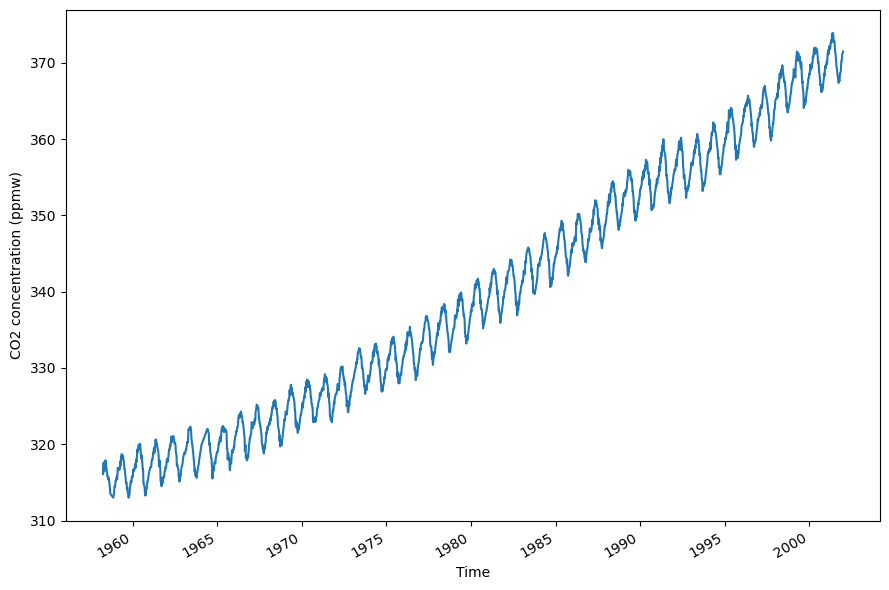

In [4]:
fig, ax = plt.subplots()

ax.plot(df['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 concentration (ppmw)')

fig.autofmt_xdate()
plt.tight_layout()

## Format data for Prophet 

In [7]:
df = df.reset_index()
df.head()

,index,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [9]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


## Hyperparameter tuning 

In [10]:
train = df[:-104]
test = df[-104:]

In [32]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

cutoffs = pd.date_range(start='1990-03-29', end='2000-01-01', freq='52W')

for param in params:
    m = Prophet(**param)
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/10 [00:00<?, ?it/s]

In [33]:
best_params = params[np.argmin(mses)]

print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}


## Rolling forecast 

In [46]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon

    if method == 'prophet':
        pred_prophet = []
        
        for i in range(train_len, total_len, window):
            m = Prophet(**best_params)
            m.fit(df[:i])
            future = m.make_future_dataframe(periods=52, freq='W')
            forecast = m.predict(future)
            pred_prophet.extend(forecast[-52:]['yhat'].values)
            
        return pred_prophet

In [47]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 52

pred_prophet = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'prophet')

test = test.copy()

test.loc[:, 'pred_prophet'] = pred_prophet

test.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y,pred_prophet
2180,2000-01-08,368.5,367.895561
2181,2000-01-15,369.0,368.121547
2182,2000-01-22,369.8,368.302782
2183,2000-01-29,369.2,368.464940
2184,2000-02-05,369.1,368.641222


## Evaluation 

In [48]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [49]:
mape_prophet = mape(test['y'], test['pred_prophet'])

0.13


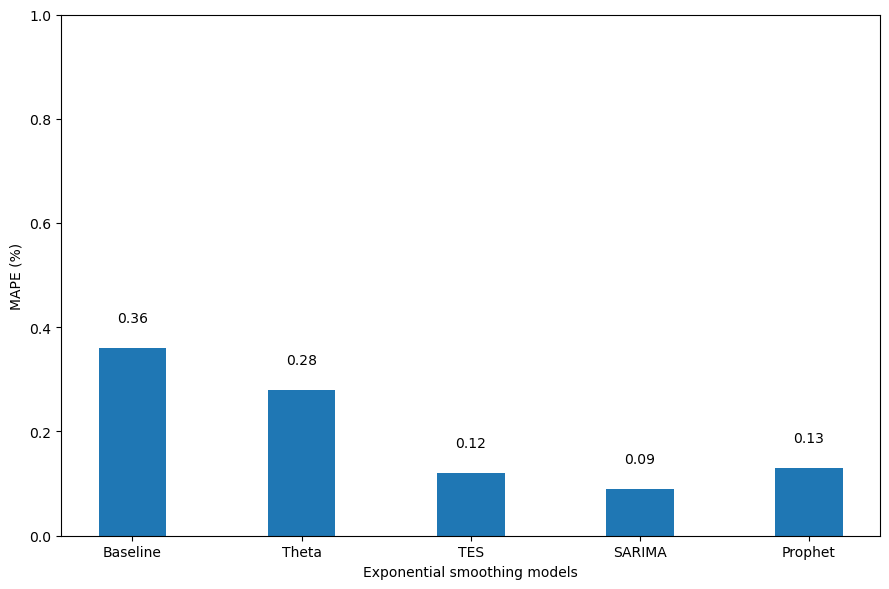

In [51]:
fig, ax = plt.subplots()

x = ['Baseline', 'Theta', 'TES', 'SARIMA', 'Prophet']
y = [0.36, 0.28, 0.12, 0.09, mape_prophet]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Exponential smoothing models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 1)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()